In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
plt.style.use('paper')

In [3]:
grav = 'GR_b64n512'
NFW_f = 0.02
rs_f = 1.0

In [4]:
d = pd.read_csv("./result.csv").dropna()

In [5]:
zs = pd.read_csv(
    "./data/redshift_list.txt",
    delimiter=" ",
    header=None,
    names=["snap", "z"]
).set_index("snap")

d["z"] = zs.loc[d["snap"]].values

In [6]:
d.head()

,prof,rs_f,grav,snap,f,bin,counts,rho_f,rho_s,z
0,nfw,1.0,GR_b64n512,122,0.02,1,1168,1.538706,4.179088,0.0
1,nfw,1.0,GR_b64n512,122,0.02,2,865,1.538106,4.186865,0.0
2,nfw,1.0,GR_b64n512,122,0.02,3,636,1.542454,4.190038,0.0
3,nfw,1.0,GR_b64n512,122,0.02,4,455,1.546296,4.186990,0.0
4,nfw,1.0,GR_b64n512,122,0.02,5,322,1.523391,4.181608,0.0


In [7]:
_d = d[
    (d['grav'] == grav) &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

x, y = _d['rho_f'], _d['rho_s']

In [8]:
def f_0(x, a):
    return a + x

popt_0, _ = curve_fit(f_0, x, y)

print(popt_0)
print(sum((f_0(x, *popt_0) - y)**2.0) / float(len(y) - len(popt_0)))

[2.7199268]
0.004831591560741428


In [9]:
def f_1(x, a, b):
    return a + b*x

popt_1, _ = curve_fit(f_1, x, y)

print(popt_1)
print(sum((f_1(x, *popt_1) - y)**2.0) / float(len(y) - len(popt_1)))

[2.80677347 0.90919522]
0.004023488488467832


In [10]:
def f_2(x, a, b, c):
    return a + b*x + c*x*x

popt_2, _ = curve_fit(f_2, x, y)

print(popt_2)
print(sum((f_2(x, *popt_2) - y)**2.0) / float(len(y) - len(popt_2)))

[ 2.77720921  0.97848556 -0.03610264]
0.004051291774351994


TODO: color code by whether halo bin falls below or above $M^*$, as calculated in `halo.ipynb`:

    snaps = [51, 61, 78, 93, 122]
    m_star = [
        12.195807148772062,
        12.556853371631494,
        12.830975647934311,
        12.919554466985371,
        12.981851739853052,
    ]

![m_star](./plots/mf_mstar.pdf)

### Coloured by mass bin

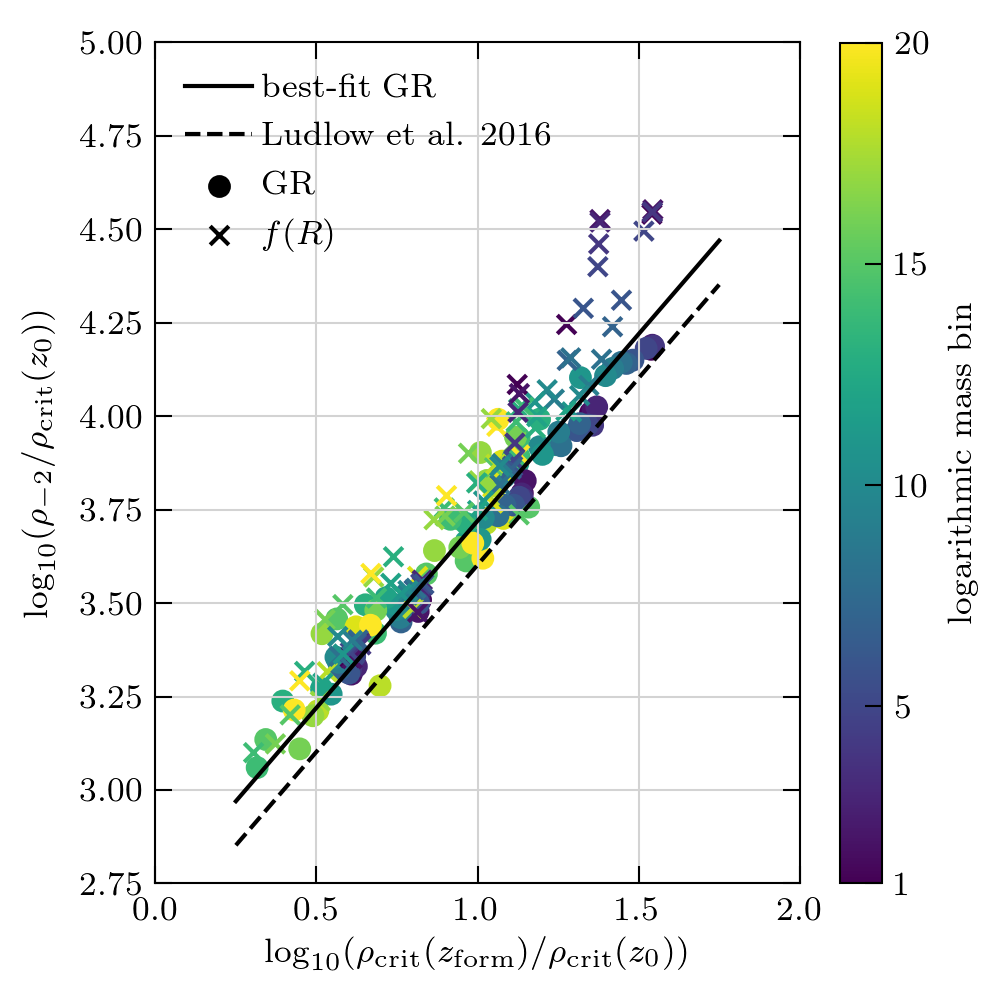

In [11]:
fig, ax = plt.subplots(1)

_d = d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['bin'], s=20, label=None)

_d = d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

fig.colorbar(
    ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='x', c=_d['bin'], s=20, label=None),
    label=r'logarithmic mass bin',
    ticks=[1, 5, 10, 15, 20, ],
    ax=ax,
)

_x = np.array([0.25, 1.75])
ax.plot(_x, popt_0[0]+_x, "k-", label="best-fit GR")
ax.plot(_x, np.log10(400.0)+_x, "k--", label="Ludlow et al. 2016")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlim((0.0, 2.0))
ax.set_ylim((2.75, 5))
ax.scatter([], [], c='k', s=20, marker='o', label=r'GR')
ax.scatter([], [], c='k', s=20, marker='x', label=r'$f(R)$')
ax.plot([])
ax.legend(loc="upper left")

fig.tight_layout()

# fig.savefig('./plots/rhorho_massbin.pdf')

### Split by $M^*$

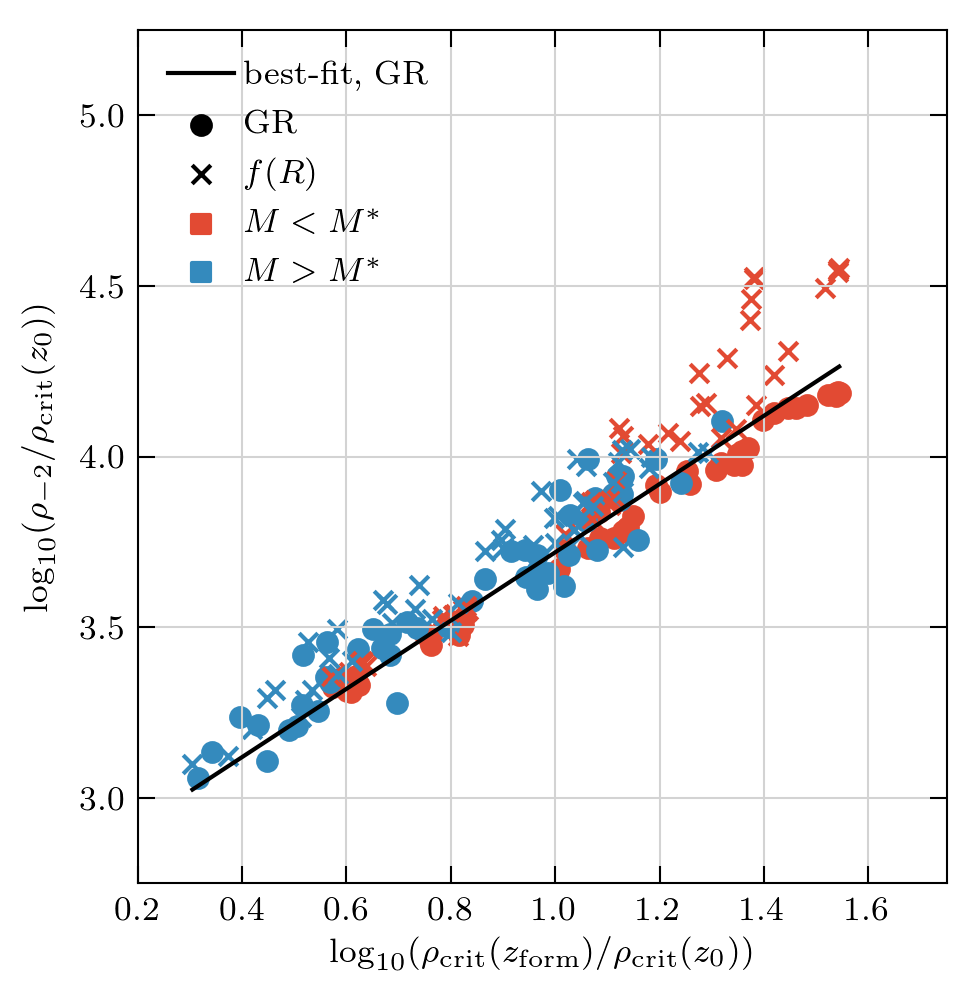

In [12]:
fig, ax = plt.subplots(1)

m_star_bins = [9, 11, 12, 12, 11]
snaps = [51, 61, 78, 93, 122]

_d = d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

for i, _s in enumerate(snaps):
    ax.scatter(
        x=_d[(_d['snap'] == _s) & (_d['bin'] < m_star_bins[i])]['rho_f'],
        y=_d[(_d['snap'] == _s) & (_d['bin'] < m_star_bins[i])]['rho_s'],
        marker='o', s=20, label=None, color='C0',
    )
    ax.scatter(
        x=_d[(_d['snap'] == _s) & (_d['bin'] >= m_star_bins[i])]['rho_f'],
        y=_d[(_d['snap'] == _s) & (_d['bin'] >= m_star_bins[i])]['rho_s'],
        marker='o', s=20, label=None, color='C1',
    )

_d = d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

for i, _s in enumerate(snaps):
    ax.scatter(
        x=_d[(_d['snap'] == _s) & (_d['bin'] < m_star_bins[i])]['rho_f'],
        y=_d[(_d['snap'] == _s) & (_d['bin'] < m_star_bins[i])]['rho_s'],
        marker='x', s=20, label=None, color='C0',
    )
    ax.scatter(
        x=_d[(_d['snap'] == _s) & (_d['bin'] >= m_star_bins[i])]['rho_f'],
        y=_d[(_d['snap'] == _s) & (_d['bin'] >= m_star_bins[i])]['rho_s'],
        marker='x', s=20, label=None, color='C1',
    )

_x = np.array([_d['rho_f'].min(), _d['rho_f'].max()])
ax.plot(_x, popt_0[0]+_x, "k-", label="best-fit, GR")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlim([0.2, 1.75])
ax.set_ylim([2.75, 5.25])

ax.scatter([], [], c='k', s=20, marker='o', label=r'GR')
ax.scatter([], [], c='k', s=20, marker='x', label=r'$f(R)$')
ax.scatter([], [], c='C0', s=20, marker='s', label=r'$M<M^{*}$')
ax.scatter([], [], c='C1', s=20, marker='s', label=r'$M>M^{*}$')
ax.legend(loc="upper left")

fig.tight_layout()

# fig.savefig('./plots/rhorho_mstar.pdf')

### Coloured by $z$

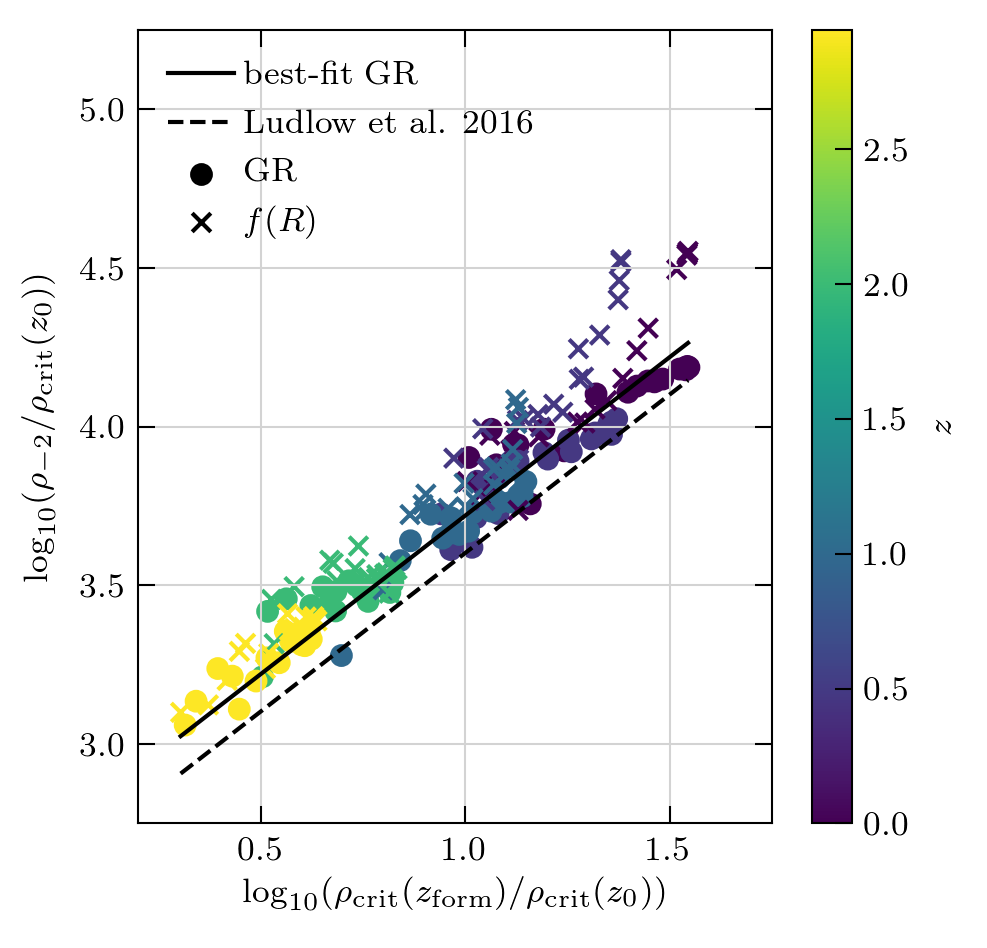

In [13]:
fig, ax = plt.subplots(1, figsize=(3.3333, 3.2))

_d = d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['z'], s=20, label=None)

_d = d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

fig.colorbar(
    ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='x', c=_d['z'], s=20, label=None),
    label=r'$z$',
    ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, ],
    ax=ax,
)

_x = np.array([_d['rho_f'].min(), _d['rho_f'].max()])

ax.plot(_x, popt_0[0]+_x, "k-", label="best-fit GR")
ax.plot(_x, np.log10(400.0)+_x, "k--", label="Ludlow et al. 2016")

ax.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
ax.set_xlim([0.2, 1.75])
ax.set_ylim([2.75, 5.25])
ax.scatter([], [], c='k', s=20, marker='o', label=r'GR')
ax.scatter([], [], c='k', s=20, marker='x', label=r'$f(R)$')
ax.legend(loc="upper left")

fig.tight_layout()

# fig.savefig('./plots/rhorho_z.pdf')

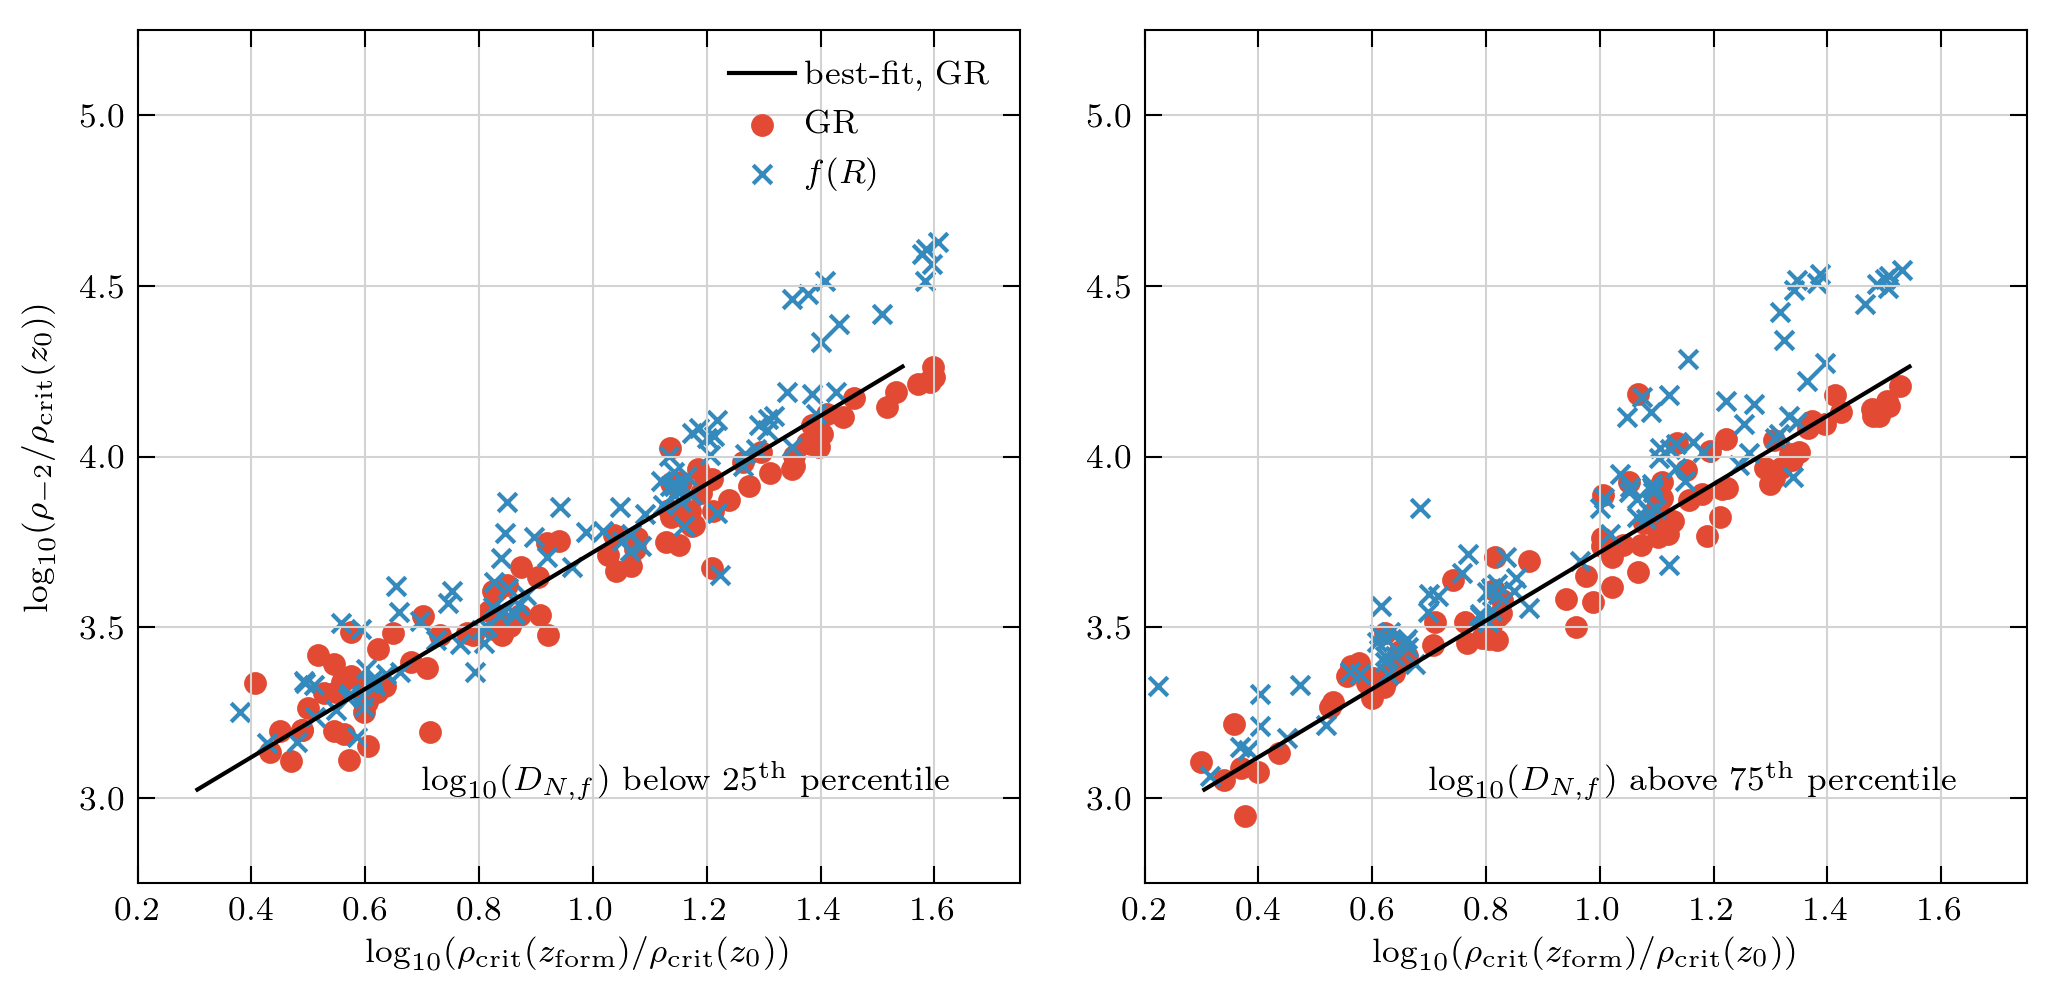

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7.0, 3.4))
# fig.suptitle(r"$rs_{f}=%.2f, f=%.2f$" % (rs_f, NFW_f))

d = pd.read_csv("./result_under.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='x', c='C1', label=r'$f(R)$')
ax[0].text(0.7, 3.0, r"$\log_{10}(D_{N,f})$ below $25^{\rm th}$ percentile")

d = pd.read_csv("./result_over.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label=None)
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='x', c='C1', label=None)
ax[1].text(0.7, 3.0, r"$\log_{10}(D_{N,f})$ above $75^{\rm th}$ percentile")

# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), np.log10(400)), label='C=400', c='C2')
# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), *popt_0), label='C=%d' % 10**popt_0[0], c='C3')
# ax.plot(np.linspace(0, 2), f_1(np.linspace(0, 2), *popt_1), label='ax+b', c='C2')

_x = np.array([_d['rho_f'].min(), _d['rho_f'].max()])
ax[0].plot(_x, popt_0[0]+_x, "k-", label="best-fit, GR")
ax[1].plot(_x, popt_0[0]+_x, "k-", label="best-fit, GR")
ax[0].legend()

for a in ax:
    a.set_xlim([0.2, 1.75])
    a.set_ylim([2.75, 5.25])
    a.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
ax[0].set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax[1].set_ylabel("")

fig.tight_layout()

# plt.savefig("./plots/rhorho_cut_bydnf.pdf")

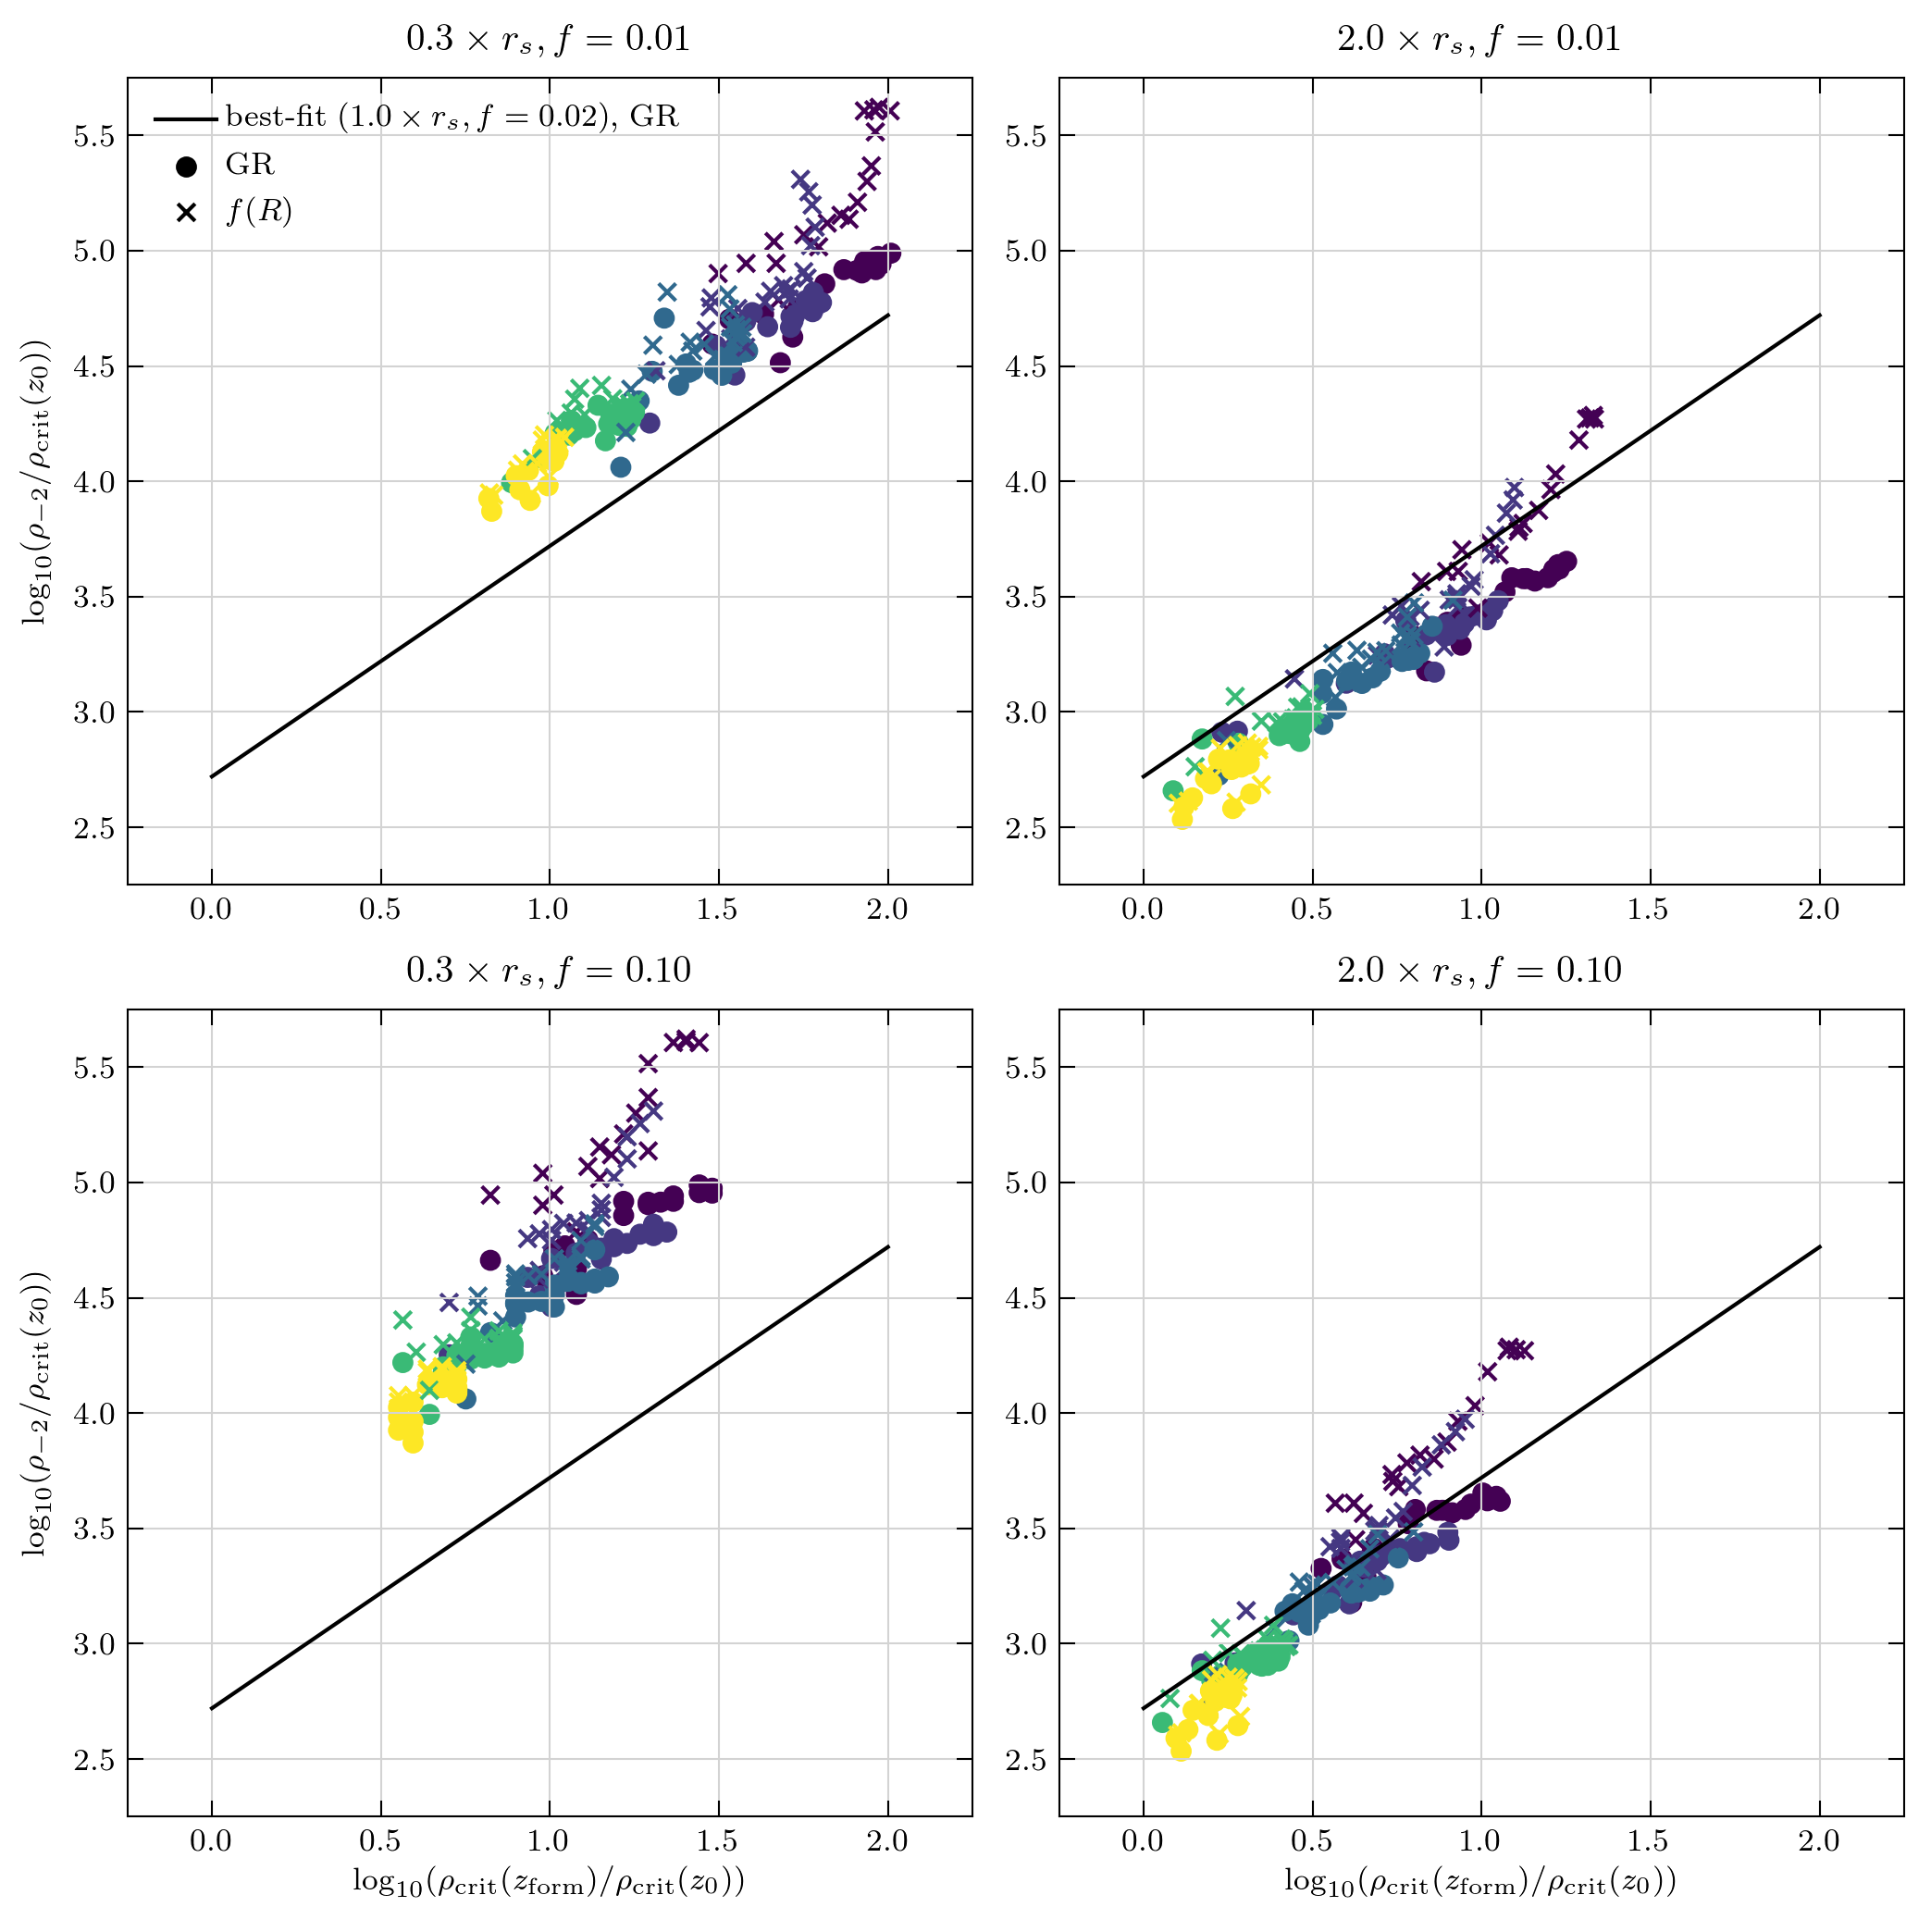

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[7, 7])

d = pd.read_csv("./output/all.csv").dropna()
d["z"] = zs.loc[d["snap"]].values

def plot_rhorho(ax, NFW_f, rs_f):

    ax.set_title(r"$%0.1f \times r_s, f=%0.2f$" % (rs_f, NFW_f))

    _d = d[
        (d['grav'] == 'GR_b64n512') &
        (d['f'] == NFW_f) &
        (d['rs_f'] == rs_f)
    ]

    ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['z'], s=20, label=None)

    _d = d[
        (d['grav'] == 'fr6_b64n512') &
        (d['f'] == NFW_f) &
        (d['rs_f'] == rs_f)
    ]

#     fig.colorbar(
    ax.scatter(x=_d['rho_f'], y=_d['rho_s'], marker='x', c=_d['z'], s=20, label=None)
#         label=r'redshift',
#         ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, ],
#         ax=ax,
#     )

    _x = np.array([_d['rho_f'].min(), _d['rho_f'].max()])
#     ax.plot(_x, np.log10(400.0)+_x, "k--")
    ax.plot(np.array([0.0, 2.0]), popt_0[0]+np.array([0.0, 2.0]), "k-")

    ax.set_xlim((-0.25, 2.25))
    ax.set_ylim((2.25, 5.75))

plot_rhorho(ax[0][0], 0.01, 0.3)
plot_rhorho(ax[0][1], 0.01, 2.0)
plot_rhorho(ax[1][0], 0.1, 0.3)
plot_rhorho(ax[1][1], 0.1, 2.0)

ax[0][0].set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax[1][0].set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
ax[1][0].set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")
ax[1][1].set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")

ax[0][0].plot([], [], "k-", label=r"best-fit ($%0.1f \times r_s, f=%0.2f$), GR" % (1.0, 0.02))
ax[0][0].scatter([], [], c='k', s=20, marker='o', label=r'GR')
ax[0][0].scatter([], [], c='k', s=20, marker='x', label=r'$f(R)$')
ax[0][0].legend(loc="upper left")

fig.tight_layout()

# fig.savefig('./plots/rhorho_vars.pdf')